# Libraries

In [1]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot
from pandas import DataFrame
import warnings
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from sklearn.metrics import mean_squared_error

# Reading CSV File

In [2]:
f1=read_csv('robberies.csv',header=0,index_col=0,squeeze=True,parse_dates=True)

# Question 1

## a)

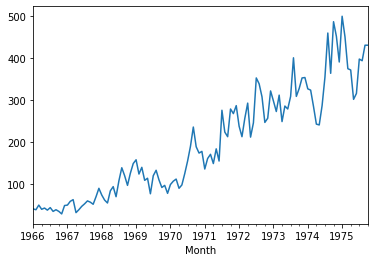

Number of Points 118



In [3]:
f1.plot()
pyplot.show()
print("Number of Points",len(f1))
print()

## b)

In [4]:
x=f1.values
result=adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


The Series is NOT Stationary.

## c)

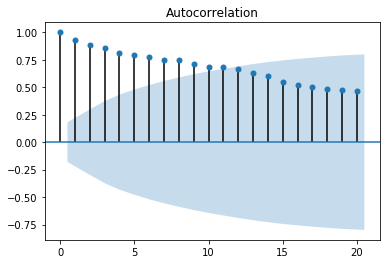

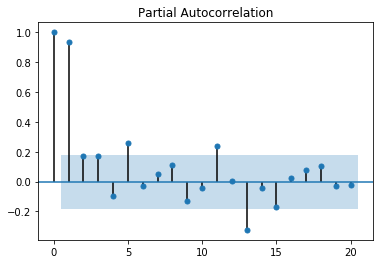

In [5]:
plot_acf(f1,lags=20)
pyplot.show()
plot_pacf(f1,lags=20)
pyplot.show()

## d)

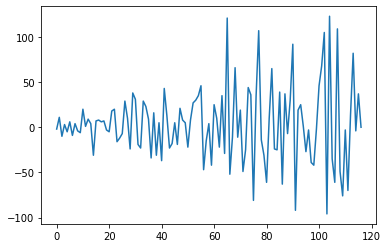

Number of Points= 117



In [6]:
d=list()
for t in range(1,len(x)):
    value=x[t]-x[t-1]
    d.append(value)
pyplot.plot(d)
pyplot.show()
print("Number of Points=",len(d))
print()

## e)

The Series is Stationary.

## f)

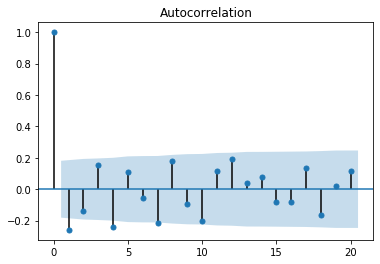

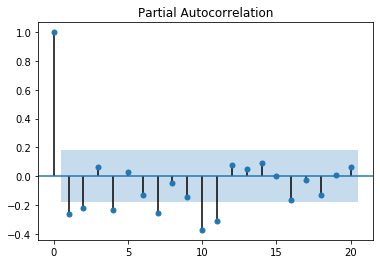

In [7]:
plot_acf(d,lags=20)
pyplot.show()
plot_pacf(d,lags=20)
pyplot.show()

p:2 and q:1

## g)

In [8]:
model=ARIMA(x,order=(2,1,1))
model_fit=model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  117
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -592.107
Method:                       css-mle   S.D. of innovations             38.118
Date:                Sun, 08 Mar 2020   AIC                           1194.213
Time:                        14:19:33   BIC                           1208.024
Sample:                             1   HQIC                          1199.820
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2980      2.539      1.299      0.197      -1.679       8.275
ar.L1.D.y     -0.8811      0.168     -5.235      0.000      -1.211      -0.551
ar.L2.D.y     -0.3641      0.086     -4.243      0.0

## h)

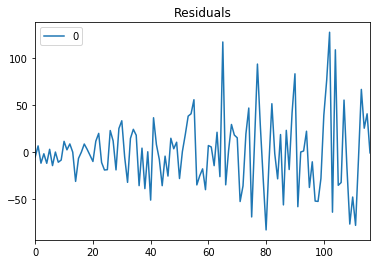

In [9]:
residuals=DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
pyplot.show()

## i)

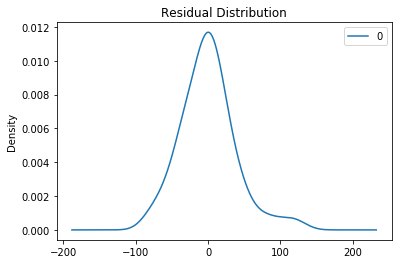

In [10]:
residuals.plot(kind='kde',title='Residual Distribution')
pyplot.show()

## j)

In [11]:
print(residuals.describe())

                0
count  117.000000
mean     0.002912
std     38.282841
min    -83.077282
25%    -25.757273
50%     -0.239529
75%     18.435387
max    127.310496


## k)

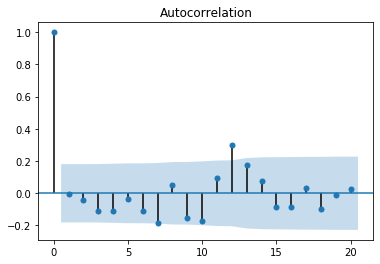

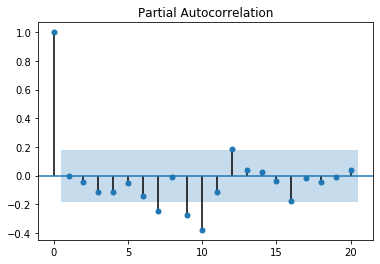

In [12]:
plot_acf(residuals,lags=20)
pyplot.show()
plot_pacf(residuals,lags=20)
pyplot.show()

## l)

### i)

In [13]:
# Differencing of Series
d=list()
for t in range(1,len(x)):
    value=x[t]-x[t-1]
    d.append(value)

# Converting Residuals to Series by ARIMA
resids=model_fit.resid
dhat=list()
for t in range(0,len(resids)):
    value=d[t]-resids[t]
    dhat.append(value)

### ii)

In [14]:
shat=list()
shat.append(x[0])
for t in range(0,len(dhat)):
    value=dhat[t]+x[t]
    shat.append(value)

### iii)

Compare model(red) to original data(blue)


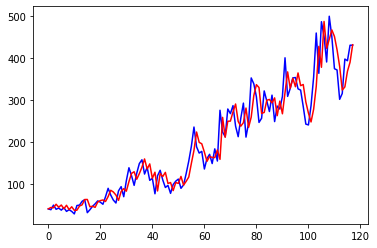

In [15]:
print('Compare model(red) to original data(blue)')
pyplot.plot(x,color='blue')
pyplot.plot(shat,color='red')
pyplot.show()

# Question 2

In [16]:
p_values=range(0,7)
d_values=range(0,3)
q_values=range(0,7)
warnings.filterwarnings('ignore')
best_score, best_cfg=float('inf'),None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            try:
                model=ARIMA(x, order)
                model_fit=model.fit(disp=0)
                AIC=ARIMAResults.aic(model_fit)
                if AIC< best_score:
                    best_score, best_cfg=AIC,order
                print('ARIMA%s AIC=%.3f' % (order,AIC))
            except:
                continue
                
print()
print('Best: ARIMA%s AIC=%.3f' % (best_cfg, best_score))
print()          

ARIMA(0, 0, 0) AIC=1483.025
ARIMA(0, 0, 1) AIC=1370.440
ARIMA(0, 0, 2) AIC=1333.202
ARIMA(0, 0, 3) AIC=1287.209
ARIMA(0, 1, 0) AIC=1205.224
ARIMA(0, 1, 1) AIC=1195.267
ARIMA(0, 1, 2) AIC=1189.947
ARIMA(0, 1, 3) AIC=1191.445
ARIMA(0, 1, 4) AIC=1183.620
ARIMA(0, 1, 5) AIC=1185.307
ARIMA(0, 1, 6) AIC=1186.504
ARIMA(0, 2, 0) AIC=1303.089
ARIMA(0, 2, 1) AIC=1202.619
ARIMA(1, 0, 0) AIC=1218.687
ARIMA(1, 0, 1) AIC=1211.669
ARIMA(1, 0, 2) AIC=1211.484
ARIMA(1, 0, 3) AIC=1213.176
ARIMA(1, 0, 5) AIC=1218.835
ARIMA(1, 1, 0) AIC=1199.151
ARIMA(1, 1, 1) AIC=1184.928
ARIMA(1, 2, 0) AIC=1263.837
ARIMA(2, 0, 0) AIC=1214.296
ARIMA(2, 1, 0) AIC=1195.470
ARIMA(2, 1, 1) AIC=1194.213
ARIMA(2, 2, 0) AIC=1228.646
ARIMA(2, 2, 1) AIC=1193.682
ARIMA(3, 0, 0) AIC=1211.780
ARIMA(3, 0, 1) AIC=1210.067
ARIMA(3, 1, 0) AIC=1197.020
ARIMA(3, 1, 1) AIC=1196.212
ARIMA(3, 2, 0) AIC=1228.152
ARIMA(3, 2, 1) AIC=1195.123
ARIMA(4, 0, 0) AIC=1212.907
ARIMA(4, 0, 1) AIC=1211.985
ARIMA(4, 0, 2) AIC=1291.382
ARIMA(4, 1, 0) AIC=1

# Question 3

## Residual Summaries of Original and Grid Model

In [17]:
# Residual Summary of Original Model
original_model=ARIMA(x,order=(2,1,1))
original_model_fit=original_model.fit(disp=0)
original_residuals=DataFrame(original_model_fit.resid)
print("Original Model: (2,1,1)")
print(original_residuals.describe())

# Residual Summary of Grid Model
grid_model=ARIMA(x,order=(6,1,3))
grid_model_fit=grid_model.fit(disp=0)
grid_residuals=DataFrame(grid_model_fit.resid)
print("\nGrid Model: (6,1,3)")
print(grid_residuals.describe())

Original Model: (2,1,1)
                0
count  117.000000
mean     0.002912
std     38.282841
min    -83.077282
25%    -25.757273
50%     -0.239529
75%     18.435387
max    127.310496

Grid Model: (6,1,3)
                0
count  117.000000
mean    -1.033471
std     34.379642
min    -76.025191
25%    -21.853543
50%     -5.024446
75%     14.589473
max    109.871876


From both the Models - Original and Grid, the Original Model is the best guess Model and Grid Model is the best Model , its AIC Value is 1182.729, Mean is -1.033471, Standard Deviation is 34.379642, whereas the AIC Value, Mean and Standard Deviation of Original Model are 1194.213, 0.002912, 38.282841 respectively.

## Graphs of Original and Grid Model

Original Model Graph


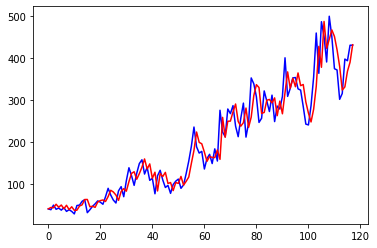

-----

Grid Model Graph


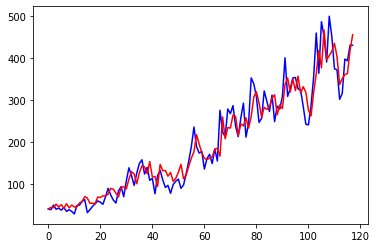

In [18]:
# Differencing of Series
d=list()
for t in range(1,len(x)):
    value=x[t]-x[t-1]
    d.append(value)

# Original Model Graph
residso=original_model_fit.resid
dhat1=list()
for t in range(0,len(residso)):
    value=d[t]-residso[t]
    dhat1.append(value)
shat1=list()
shat1.append(x[0])
for t in range(0,len(dhat1)):
    value=dhat1[t]+x[t]
    shat1.append(value)
print("Original Model Graph")
pyplot.plot(x, color='blue')
pyplot.plot(shat1, color='red')
pyplot.show()

print("-----")

# Grid Model Graph
residsg=grid_model_fit.resid
dhat2=list()
for t in range(0,len(residsg)):
    value=d[t]-residsg[t]
    dhat2.append(value)
shat2=list()
shat2.append(x[0])
for t in range(0,len(dhat2)):
    value=dhat2[t]+x[t]
    shat2.append(value)
print("\nGrid Model Graph")
pyplot.plot(x, color='blue')
pyplot.plot(shat2, color='red')
pyplot.show()

Ideally, we’d like a mean of zero and the smallest standard deviation possible. From both the plots, we can see that the differences are very subtle.

# Question 4

## a)

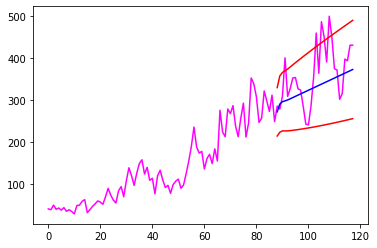


Full prediction interval:


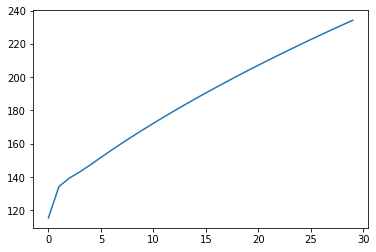

In [19]:
X=f1.values
X=X.astype('float64')
size=int(len(X)*.75)
train, test= X[0:size],X[size:len(X)]
history=[x for x in train]

p=2
d=1
q=1

model=ARIMA(history, order=(p,d,q))
model_fit=model.fit(disp=0)
predictions=model_fit.forecast(steps=len(test))[0]
limits= DataFrame(model_fit.forecast(steps=len(test))[2])
lowerlimit=limits[0]
upperlimit=limits[1]
predictionint=upperlimit-lowerlimit

pyplot.plot(X, color='magenta')
pyplot.plot([None for i in train]+[x for x in predictions], color='blue')
pyplot.plot([None for i in train]+[x for x in lowerlimit], color='red')
pyplot.plot([None for i in train]+[x for x in upperlimit], color='red')
pyplot.show()
print()
print('Full prediction interval:')
pyplot.plot(predictionint)
pyplot.show()

## b)

predicted=272.287974, expected=286.000000
predicted=298.817216, expected=279.000000
predicted=289.525733, expected=309.000000
predicted=308.059379, expected=401.000000
predicted=364.606484, expected=309.000000
predicted=310.591739, expected=328.000000
predicted=330.552252, expected=353.000000
predicted=344.866382, expected=354.000000
predicted=347.608681, expected=327.000000
predicted=336.462033, expected=324.000000
predicted=337.337407, expected=285.000000
predicted=315.233015, expected=243.000000
predicted=287.444042, expected=241.000000
predicted=279.420111, expected=287.000000
predicted=304.985628, expected=355.000000
predicted=347.327525, expected=460.000000
predicted=419.031823, expected=364.000000
predicted=349.529478, expected=487.000000
predicted=430.010557, expected=452.000000
predicted=427.221237, expected=391.000000
predicted=389.246399, expected=500.000000
predicted=461.709338, expected=451.000000
predicted=457.925278, expected=375.000000
predicted=429.096575, expected=372

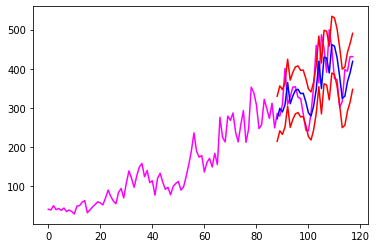


Full prediction interval:


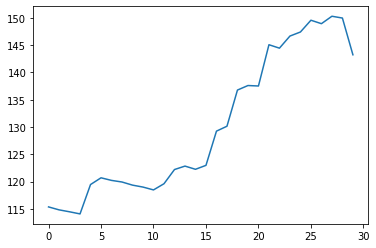

In [20]:
predictions=list()
lowerlimit=list()
upperlimit=list()
predictionint=list()
for t in range(len(test)):
    model=ARIMA(history, order=(p,d,q))
    model_fit=model.fit(disp=0)
    
    yhat=model_fit.forecast()[0]
    lolim=model_fit.forecast()[2][0][0]
    uplim=model_fit.forecast()[2][0][1]
    interval=uplim-lolim
    
    predictions.append(yhat)
    lowerlimit.append(lolim)
    upperlimit.append(uplim)
    predictionint.append(interval)
    
    obs=test[t]
    history.append(obs)
    
    print('predicted=%f, expected=%f' %(yhat, obs))
    
rmse=sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(history, color='magenta')
pyplot.plot([None for i in train]+[x for x in predictions], color='blue')
pyplot.plot([None for i in train]+[x for x in lowerlimit], color='red')
pyplot.plot([None for i in train]+[x for x in upperlimit], color='red')
pyplot.show()
print()
print('Full prediction interval:')
pyplot.plot(predictionint)
pyplot.show()